## Task 2

In [42]:
def process_dna_file(filename):
    sequences = {}  # dictionary to store the seqs
    current_id = None
    current_sequence = ""  # To store the seqs when it covers multiple rows

    with open(filename, "r") as file:
        lines = file.readlines()

    for line in lines:
        line = line.strip()

        if line.startswith(">"):  # new seq starts here
            if current_id is not None:
                sequences[current_id] = current_sequence  # Saves the previous seq

            current_id = line  # updates seqID
            current_sequence = ""  # resets the seq
        else:
            current_sequence += line  # adding the seq row to the current seq

        if current_id is not None: #add the last seq
            sequences[current_id] = current_sequence

    return sequences


def count_letters (sequence):
    letter_counts ={"a": 0, "t": 0, "c": 0, "g": 0} #create dictionary to count a,t,c,g

    for letter in sequence.lower(): 
        if letter in letter_counts:
            letter_counts[letter]+= 1
    
    return letter_counts

import matplotlib.pyplot as plt 

def plot_letters_frequencies(letter_counts):
    labels = list(letter_counts.keys()) #A, T, C, G
    values = list(letter_counts.values()) #Amout of A, T, C, G

    plt.bar(labels, values, color=["blue", "red", "green", "yellow"]) #staplegraph with colors for each letter
    plt.xlabel("DNA Letters")       #design choice of names 
    plt.ylabel("Frequency")
    plt.title(f"Letter frequencies in DNA-seq")
    plt.show()

Frequencies: {'a': 17, 't': 7, 'c': 8, 'g': 2}


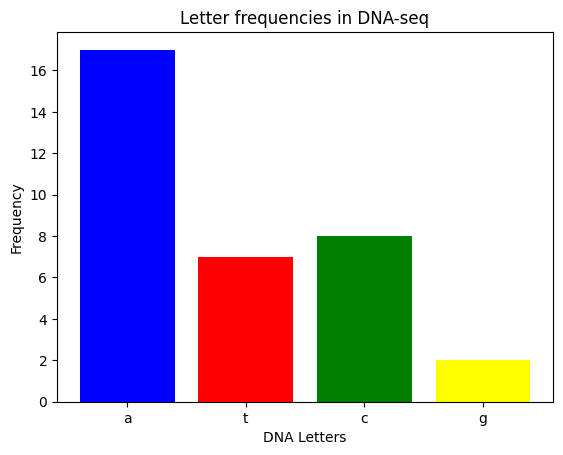

Frequencies: {'a': 3, 't': 7, 'c': 4, 'g': 10}


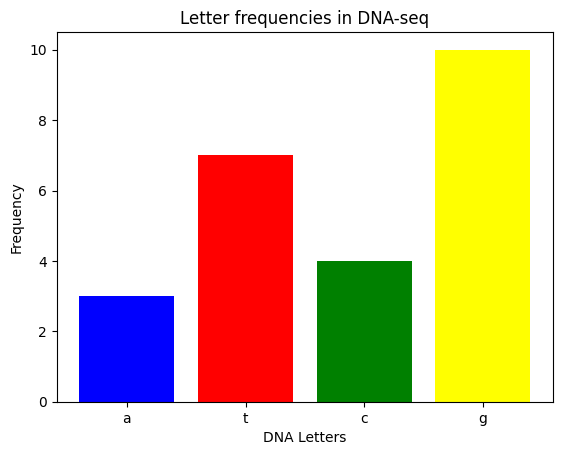

Frequencies: {'a': 36, 't': 19, 'c': 34, 'g': 21}


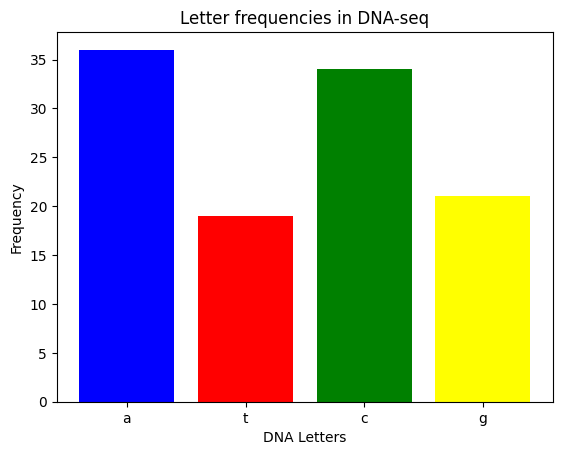

Frequencies: {'a': 17, 't': 12, 'c': 15, 'g': 20}


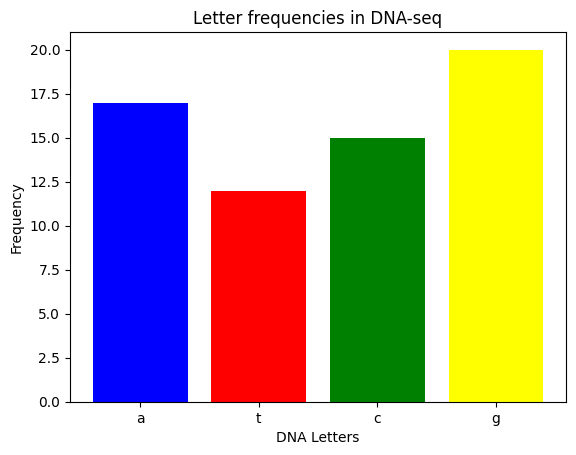

In [47]:
filename = "dna_raw_complicated.txt" #taking in my txt file
sequences = process_dna_file(filename) #using my function on the txt file

for seq_id, sequence in sequences.items(): #print the result:
    letter_counts = count_letters(sequence)
    print(f"Frequencies: {letter_counts}")
    plot_letters_frequencies(letter_counts)